In [227]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
import numpy as np

In [228]:
train_targets = pd.read_csv('train_targets.csv')
X_test_estimated = pd.read_csv('X_test_estimated.csv')
X_train_estimated = pd.read_csv('X_train_estimated.csv')
X_train_observed = pd.read_csv('X_train_observed.csv')

In [229]:
X_train_observed.describe()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
count,29668.000000,29668.000000,29668.000000,2.966800e+04,29668.000000,29668.000000,29668.000000,29668.000000,29668.000000,2.966800e+04,...,29668.000000,29668.000000,29668.000000,29668.000000,29668.000000,29668.000000,29668.000000,29668.000000,29668.000000,29668.000000
mean,6.652541,1.249066,3163.556428,5.993853e+05,166.499231,1873.489861,0.022785,276.822981,45.021690,1.620783e+05,...,182.429217,1.527661,0.059145,280.708561,74.307702,32446.553637,3.042952,0.754783,0.514868,0.000024
std,2.798130,0.036344,2822.818778,8.795484e+05,244.944679,2024.261706,0.191028,6.705049,64.627907,2.300611e+05,...,103.769571,24.148768,0.112496,6.577199,34.186838,18244.411915,1.792310,2.858518,1.862125,0.001536
min,0.700000,1.145000,27.800000,0.000000e+00,0.000000,27.900000,-1.000000,250.900000,0.000000,0.000000e+00,...,0.012000,-49.941000,0.000000,258.900000,0.000000,154.300000,0.000000,-7.300000,-9.300000,-0.000000
25%,4.400000,1.224000,1109.250000,0.000000e+00,0.000000,596.075000,0.000000,272.100000,0.000000,0.000000e+00,...,90.750500,-15.149000,0.000000,275.900000,53.700000,14959.125000,1.700000,-1.400000,-0.700000,0.000000
50%,6.300000,1.247000,1982.850000,3.645785e+04,8.200000,1206.400000,0.000000,277.200000,4.600000,2.451285e+04,...,179.517500,1.148000,0.000000,280.700000,94.800000,36747.850000,2.700000,0.400000,0.500000,-0.000000
75%,8.600000,1.272000,4571.225000,1.042457e+06,285.400000,2199.625000,0.000000,282.000000,76.900000,2.764236e+05,...,273.256500,18.766750,0.100000,285.200000,100.000000,48326.575000,4.100000,2.700000,1.700000,0.000000
max,17.500000,1.427000,12328.500000,3.004693e+06,834.800000,11688.700000,1.000000,293.800000,336.700000,1.182250e+06,...,359.996000,49.880000,1.400000,303.300000,100.000000,71349.900000,15.200000,12.200000,8.600000,0.100000


In [230]:
X_train_estimated.describe()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
count,4394.000000,4394.000000,4394.000000,4.394000e+03,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,...,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.0
mean,4.092581,1.281733,3534.729472,2.371242e+05,65.868730,1695.017137,0.009786,270.222872,22.919413,82510.105121,...,182.532631,-10.693312,0.032453,274.724078,73.725307,33475.082499,3.182863,-0.016545,0.923259,0.0
std,1.512247,0.030087,2960.864924,5.173883e+05,144.175208,2025.268566,0.224079,5.219171,45.826780,162906.738622,...,100.127552,21.692067,0.084507,4.643158,36.318543,17188.421973,1.799562,3.061109,1.774366,0.0
min,1.000000,1.212000,27.900000,0.000000e+00,0.000000,27.800000,-1.000000,254.700000,0.000000,0.000000,...,8.099000,-49.921000,0.000000,259.700000,0.000000,190.500000,0.100000,-7.200000,-5.300000,-0.0
25%,3.000000,1.262000,1069.550000,0.000000e+00,0.000000,447.400000,0.000000,266.800000,0.000000,0.000000,...,97.182750,-28.352750,0.000000,271.800000,47.925000,19430.850000,1.700000,-2.200000,-0.200000,0.0
50%,3.900000,1.279000,2799.550000,0.000000e+00,0.000000,877.950000,0.000000,270.400000,0.000000,0.000000,...,186.832500,-10.001500,0.000000,274.700000,98.000000,34847.250000,2.900000,-0.300000,1.000000,-0.0
75%,5.100000,1.301000,5337.725000,1.383404e+05,37.400000,2025.100000,0.000000,273.900000,23.175000,79709.100000,...,267.941750,4.499500,0.000000,277.800000,100.000000,48032.525000,4.300000,1.500000,2.000000,-0.0
max,8.800000,1.374000,12307.700000,2.551917e+06,710.300000,10813.700000,1.000000,282.100000,296.900000,999046.200000,...,359.710000,41.119000,0.900000,285.900000,100.000000,68498.500000,10.500000,10.100000,6.800000,-0.0


In [231]:
train_targets.describe()

,pv_measurement
count,34085.000000
mean,630.594707
std,1165.902422
min,0.000000
25%,0.000000
50%,5.940000
75%,678.040000
max,5733.420000


In [232]:
df = pd.concat([X_train_observed, X_train_estimated])
df.describe()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
count,34062.000000,34062.000000,34062.000000,3.406200e+04,34062.000000,34062.000000,34062.000000,34062.000000,34062.000000,3.406200e+04,...,34062.000000,34062.000000,34062.000000,34062.000000,34062.000000,34062.00000,34062.000000,34062.000000,34062.000000,34062.000000
mean,6.322306,1.253280,3211.437772,5.526536e+05,153.517891,1850.466869,0.021109,275.971567,42.170495,1.518140e+05,...,182.442558,-0.048845,0.055701,279.936563,74.232573,32579.23392,3.061001,0.655282,0.567550,0.000021
std,2.801928,0.037245,2843.681980,8.503401e+05,236.805195,2025.245675,0.195650,6.896801,62.957892,2.241302e+05,...,103.305531,24.195096,0.109654,6.669603,34.469234,18114.68622,1.793834,2.896966,1.856068,0.001433
min,0.700000,1.145000,27.800000,0.000000e+00,0.000000,27.800000,-1.000000,250.900000,0.000000,0.000000e+00,...,0.012000,-49.941000,0.000000,258.900000,0.000000,154.30000,0.000000,-7.300000,-9.300000,-0.000000
25%,4.200000,1.228000,1105.600000,0.000000e+00,0.000000,569.800000,0.000000,271.300000,0.000000,0.000000e+00,...,91.864000,-17.028750,0.000000,275.200000,53.100000,15583.87500,1.700000,-1.500000,-0.700000,0.000000
50%,5.800000,1.251000,2054.850000,1.537110e+04,0.000000,1166.800000,0.000000,276.000000,0.000000,1.596225e+04,...,179.524000,-0.051500,0.000000,279.500000,95.200000,36458.20000,2.700000,0.300000,0.600000,0.000000
75%,8.300000,1.277000,4743.100000,9.042787e+05,249.700000,2183.050000,0.000000,281.300000,71.200000,2.561782e+05,...,272.301000,16.982750,0.100000,284.600000,100.000000,48313.57500,4.100000,2.600000,1.700000,0.000000
max,17.500000,1.427000,12328.500000,3.004693e+06,834.800000,11688.700000,1.000000,293.800000,336.700000,1.182250e+06,...,359.996000,49.880000,1.400000,303.300000,100.000000,71349.90000,15.200000,12.200000,8.600000,0.100000


In [233]:
df = pd.merge(df, train_targets, left_on='date_forecast', right_on='time', how='inner')
df.describe()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,pv_measurement
count,34061.000000,34061.000000,34061.000000,3.406100e+04,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,3.406100e+04,...,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000
mean,6.322345,1.253279,3211.494140,5.526699e+05,153.522398,1850.516808,0.021109,275.971636,42.171733,1.518185e+05,...,-0.047865,0.055703,279.936667,74.234738,32579.110149,3.061046,0.655333,0.567538,0.000021,631.011165
std,2.801960,0.037245,2843.704696,8.503473e+05,236.807210,2025.254433,0.195653,6.896890,62.958402,2.241320e+05,...,24.194776,0.109655,6.669673,34.467425,18114.937738,1.793841,2.896993,1.856094,0.001433,1166.206066
min,0.700000,1.145000,27.800000,0.000000e+00,0.000000,27.800000,-1.000000,250.900000,0.000000,0.000000e+00,...,-49.941000,0.000000,258.900000,0.000000,154.300000,0.000000,-7.300000,-9.300000,-0.000000,0.000000
25%,4.200000,1.228000,1105.600000,0.000000e+00,0.000000,569.800000,0.000000,271.300000,0.000000,0.000000e+00,...,-17.025000,0.000000,275.200000,53.100000,15583.600000,1.700000,-1.500000,-0.700000,0.000000,0.000000
50%,5.800000,1.251000,2054.900000,1.537820e+04,0.000000,1166.800000,0.000000,276.000000,0.000000,1.596740e+04,...,-0.051000,0.000000,279.500000,95.200000,36456.200000,2.700000,0.300000,0.600000,0.000000,6.160000
75%,8.300000,1.277000,4743.200000,9.042897e+05,249.700000,2183.100000,0.000000,281.300000,71.200000,2.561786e+05,...,16.985000,0.100000,284.600000,100.000000,48313.600000,4.100000,2.600000,1.700000,0.000000,679.140000
max,17.500000,1.427000,12328.500000,3.004693e+06,834.800000,11688.700000,1.000000,293.800000,336.700000,1.182250e+06,...,49.880000,1.400000,303.300000,100.000000,71349.900000,15.200000,12.200000,8.600000,0.100000,5733.420000


In [235]:
# Define a function to filter rows where date_forecast is not a whole hour
def filter_whole_hour_rows(df, date_forecast_col='date_forecast'):
    # Parse date_forecast column to datetime
    df[date_forecast_col] = pd.to_datetime(df[date_forecast_col])
    # Filter rows where date_forecast is a whole hour
    df_filtered = df[df[date_forecast_col].dt.minute == 0]
    return df_filtered

# Apply the filter to the datasets
X_test_estimated = filter_whole_hour_rows(X_test_estimated)
X_train_estimated = filter_whole_hour_rows(X_train_estimated)
X_train_observed = filter_whole_hour_rows(X_train_observed)

In [236]:
X_train_observed.isnull().sum()

date_forecast                     0
absolute_humidity_2m:gm3          0
air_density_2m:kgm3               0
ceiling_height_agl:m              0
clear_sky_energy_1h:J             0
clear_sky_rad:W                   0
cloud_base_agl:m                  0
dew_or_rime:idx                   0
dew_point_2m:K                    0
diffuse_rad:W                     0
diffuse_rad_1h:J                  0
direct_rad:W                      0
direct_rad_1h:J                   0
effective_cloud_cover:p           0
elevation:m                       0
fresh_snow_12h:cm                 0
fresh_snow_1h:cm                  0
fresh_snow_24h:cm                 0
fresh_snow_3h:cm                  0
fresh_snow_6h:cm                  0
is_day:idx                        0
is_in_shadow:idx                  0
msl_pressure:hPa                  0
precip_5min:mm                    0
precip_type_5min:idx              0
pressure_100m:hPa                 0
pressure_50m:hPa                  0
prob_rime:p                 

In [237]:
X_train_estimated.isnull().sum()

date_forecast                     0
absolute_humidity_2m:gm3          0
air_density_2m:kgm3               0
ceiling_height_agl:m              0
clear_sky_energy_1h:J             0
clear_sky_rad:W                   0
cloud_base_agl:m                  0
dew_or_rime:idx                   0
dew_point_2m:K                    0
diffuse_rad:W                     0
diffuse_rad_1h:J                  0
direct_rad:W                      0
direct_rad_1h:J                   0
effective_cloud_cover:p           0
elevation:m                       0
fresh_snow_12h:cm                 0
fresh_snow_1h:cm                  0
fresh_snow_24h:cm                 0
fresh_snow_3h:cm                  0
fresh_snow_6h:cm                  0
is_day:idx                        0
is_in_shadow:idx                  0
msl_pressure:hPa                  0
precip_5min:mm                    0
precip_type_5min:idx              0
pressure_100m:hPa                 0
pressure_50m:hPa                  0
prob_rime:p                 

In [238]:
X_test_estimated.isnull().sum()

date_forecast                     0
absolute_humidity_2m:gm3          0
air_density_2m:kgm3               0
ceiling_height_agl:m              0
clear_sky_energy_1h:J             0
clear_sky_rad:W                   0
cloud_base_agl:m                  0
dew_or_rime:idx                   0
dew_point_2m:K                    0
diffuse_rad:W                     0
diffuse_rad_1h:J                  0
direct_rad:W                      0
direct_rad_1h:J                   0
effective_cloud_cover:p           0
elevation:m                       0
fresh_snow_12h:cm                 0
fresh_snow_1h:cm                  0
fresh_snow_24h:cm                 0
fresh_snow_3h:cm                  0
fresh_snow_6h:cm                  0
is_day:idx                        0
is_in_shadow:idx                  0
msl_pressure:hPa                  0
precip_5min:mm                    0
precip_type_5min:idx              0
pressure_100m:hPa                 0
pressure_50m:hPa                  0
prob_rime:p                 

In [239]:
train_targets.isnull().sum()

time              0
pv_measurement    0
dtype: int64

In [240]:
def fill_missing_values(df):
    # Fill missing values in 'snow_density:kgm3' with 0
    df['snow_density:kgm3'].fillna(0, inplace=True)

    # Use forward-fill to fill missing values in 'ceiling_height_agl:m' and 'cloud_base_agl:m'
    df['ceiling_height_agl:m'].fillna(method='ffill', inplace=True)
    df['cloud_base_agl:m'].fillna(method='ffill', inplace=True)

    # Use backward-fill for any remaining missing values in 'ceiling_height_agl:m' and 'cloud_base_agl:m'
    df['ceiling_height_agl:m'].fillna(method='bfill', inplace=True)
    df['cloud_base_agl:m'].fillna(method='bfill', inplace=True)


# Apply the fill_missing_values function to the datasets
fill_missing_values(X_test_estimated)
fill_missing_values(X_train_estimated)
fill_missing_values(X_train_observed)
fill_missing_values(df)

In [241]:
df['time'] = df.index

In [242]:
# Create function for rolling stats

In [243]:
# Create function to merge discrepancy values

In [244]:
# Create function to add interaction pairs

In [245]:
# Normalize data

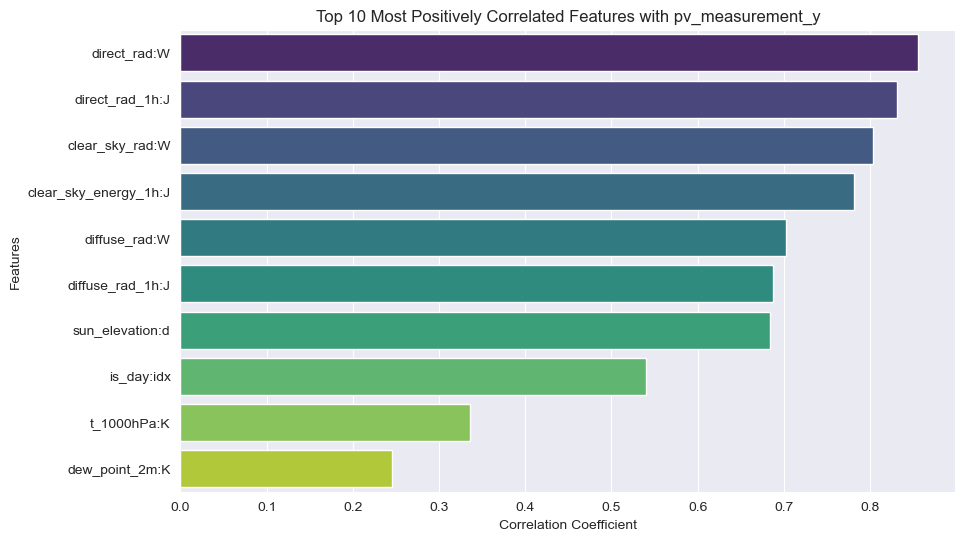

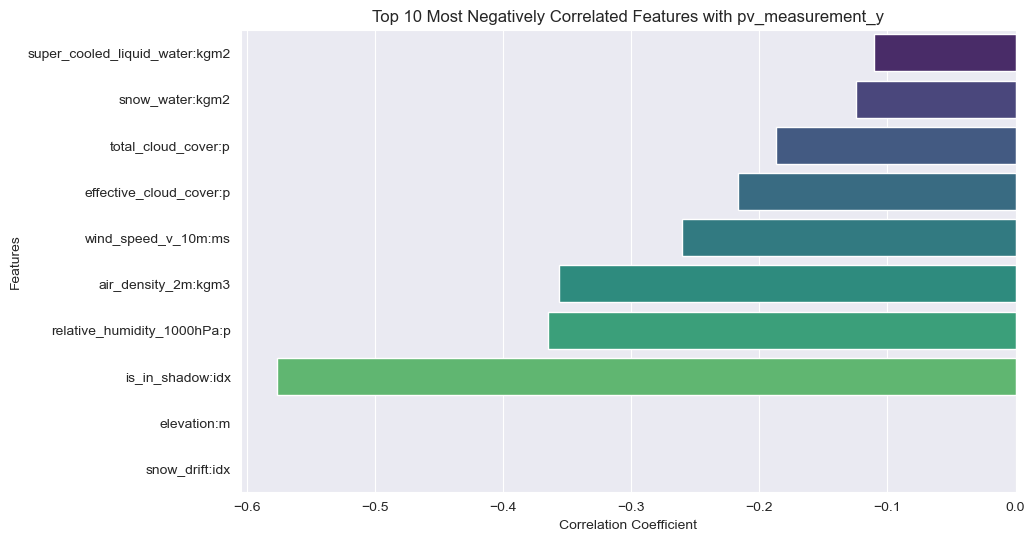

In [250]:
# Calculate the correlation matrix
correlation_matrix = df.drop(columns='date_forecast').corr()

# Focus on the correlations of features with the target variable 'pv_measurement_y'
target_correlations = correlation_matrix['pv_measurement'].sort_values(ascending=False)

# Code to plot the 10 most positively correlated features with the target variable
plt.figure(figsize=(10, 6))
top_10_positive_corr = target_correlations.head(11)[1:]  # Exclude self-correlation of target variable
sns.barplot(x=top_10_positive_corr.values, y=top_10_positive_corr.index, palette='viridis')
plt.title('Top 10 Most Positively Correlated Features with pv_measurement_y')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# Code to plot the 10 most negatively correlated features with the target variable
plt.figure(figsize=(10, 6))
top_10_negative_corr = target_correlations.tail(11)[1:]
sns.barplot(x=top_10_negative_corr.values, y=top_10_negative_corr.index, palette='viridis')
plt.title('Top 10 Most Negatively Correlated Features with pv_measurement_y')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

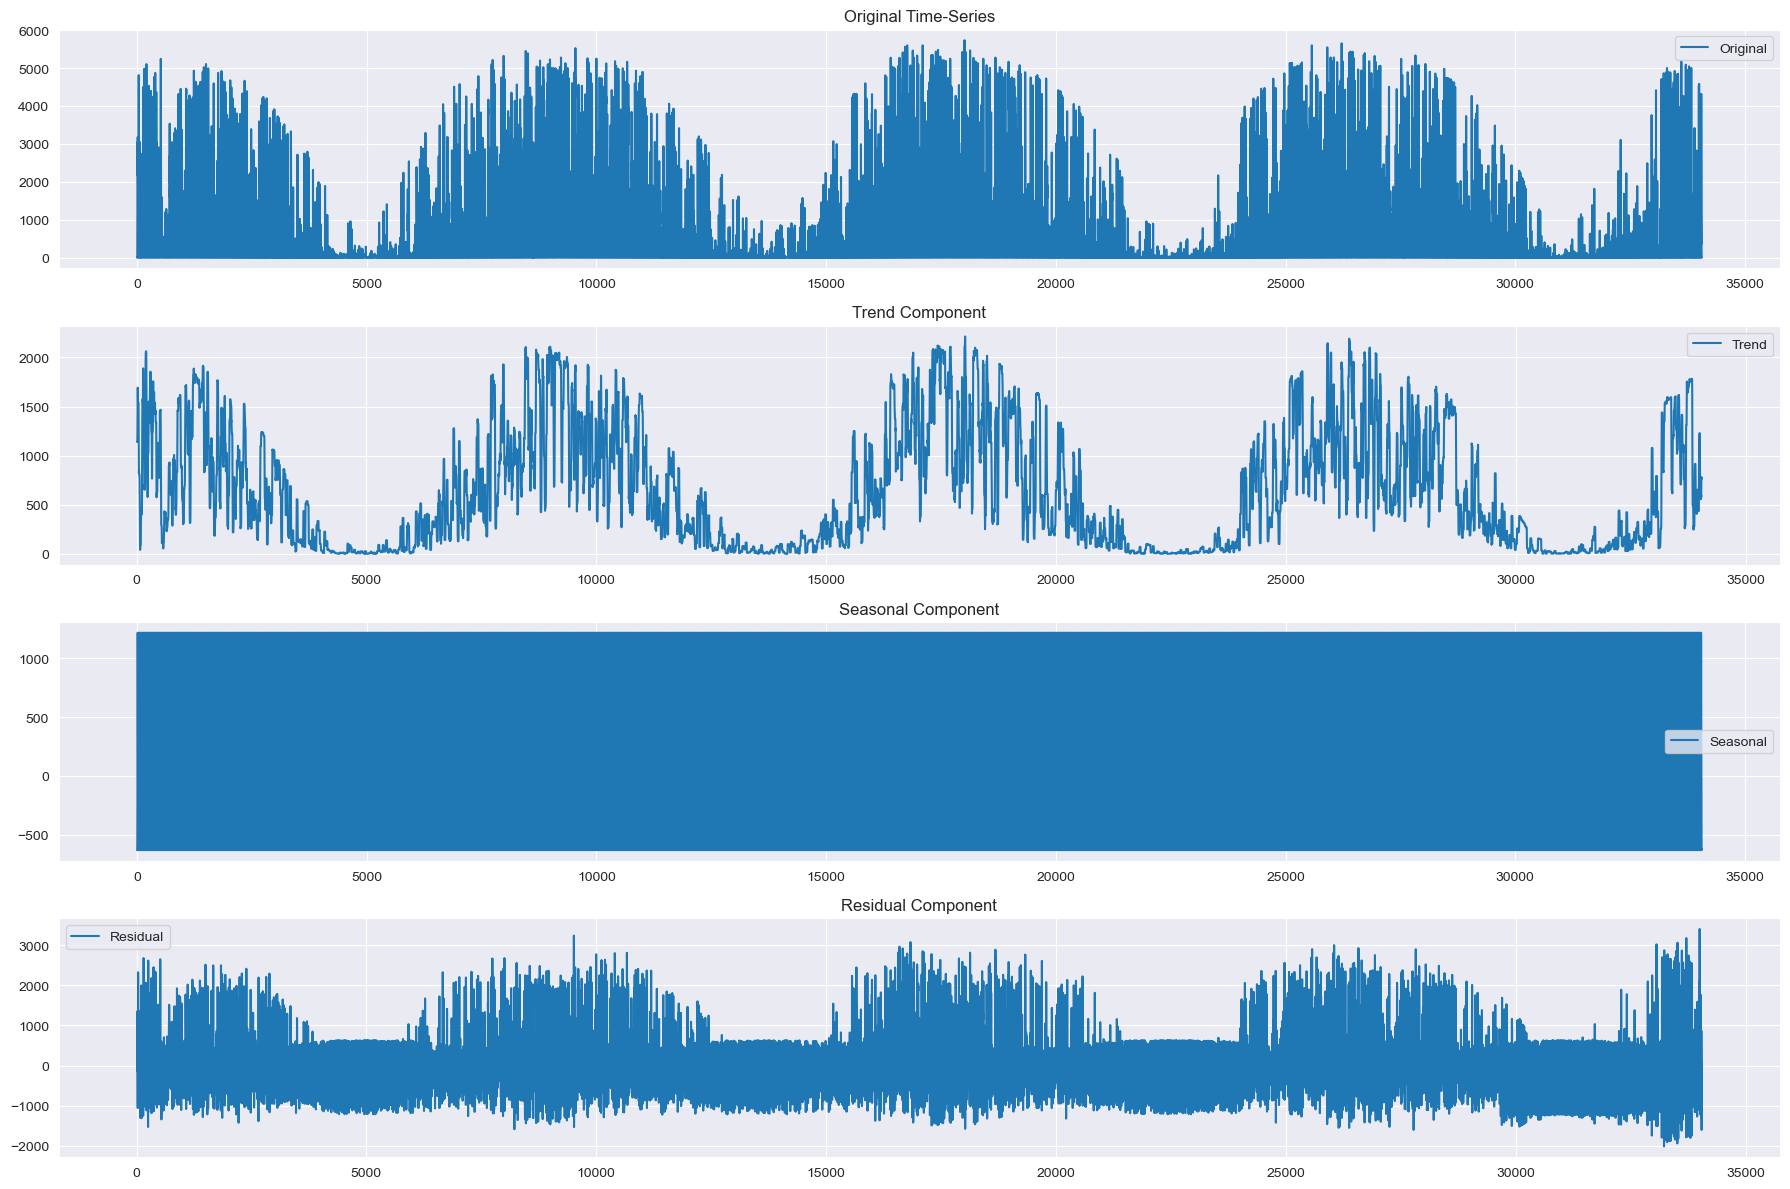

In [259]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Decompose the time-series data to observe trend and seasonality
decomposition = seasonal_decompose(df['pv_measurement'], model='additive', period=24)

# Plotting the original time-series, trend, seasonal, and residual components
plt.figure(figsize=(18, 12))

plt.subplot(411)
plt.plot(df['pv_measurement'], label='Original')
plt.legend(loc='best')
plt.title('Original Time-Series')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

In [ ]:
# # Zoom into a smaller time frame (one week) to better visualize the seasonal component
# one_week_data = decomposition.seasonal['2019-06-01':'2019-06-07']
# 
# # Plotting the seasonal component for the selected time frame
# plt.figure(figsize=(18, 6))
# plt.plot(one_week_data, label='Seasonal (One Week)')
# plt.legend(loc='best')
# plt.title('Seasonal Component for One Week')
# plt.xlabel('Date')
# plt.ylabel('Seasonal Effect')
# plt.show()

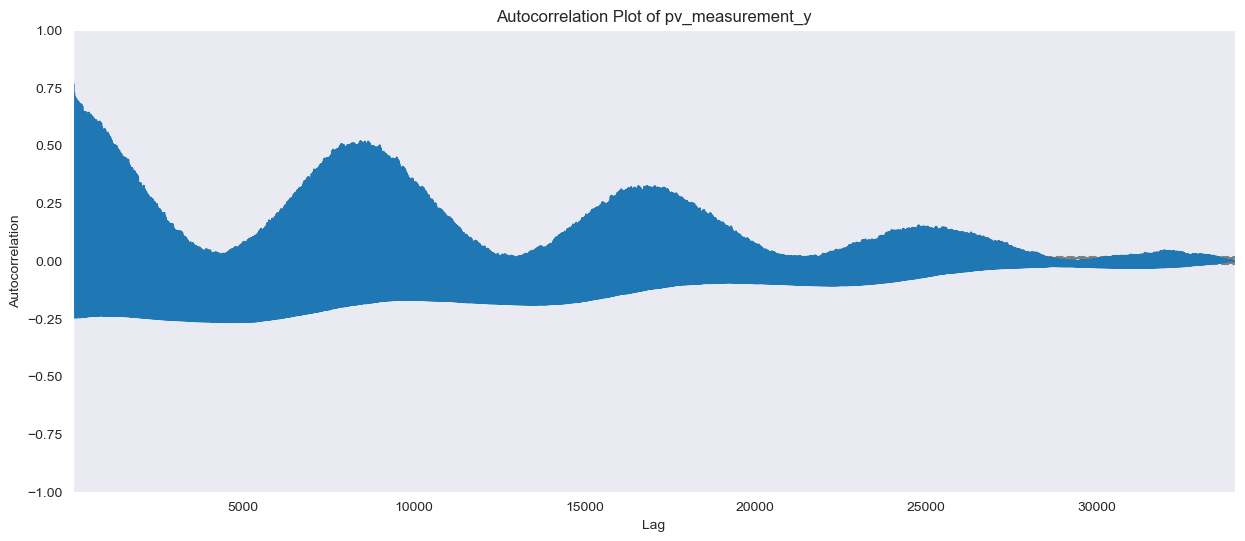

In [261]:
# Importing necessary libraries for time-series analysis
from pandas.plotting import autocorrelation_plot

# Convert 'date_forecast' to datetime format for time-series analysis
df['date_forecast'] = pd.to_datetime(df['date_forecast'])

# Autocorrelation plot for 'pv_measurement_y'
plt.figure(figsize=(15, 6))
autocorrelation_plot(df['pv_measurement'])
plt.title('Autocorrelation Plot of pv_measurement_y')
plt.show()

In [266]:
def date_features(df):
    df['hour'] = pd.to_datetime(df['time']).dt.hour
    df['day'] = pd.to_datetime(df['time']).dt.dayofyear
    df['month'] = pd.to_datetime(df['time']).dt.month
    df['quarter'] = pd.to_datetime(df['time']).dt.quarter

    df['lagged_pv_measurement_1h'] = df['pv_measurement'].shift(1)
    df['lagged_pv_measurement_3h'] = df['pv_measurement'].shift(3)
    df['lagged_pv_measurement_6h'] = df['pv_measurement'].shift(6)
    
    df['rolling_mean_pv_measurement_3h'] = df['pv_measurement'].rolling(window=3).mean()
    return df

date_features(df)

In [267]:
# Convert columns to numeric types if possible, to handle the TypeError
X_train_observed = X_train_observed.apply(pd.to_numeric, errors='ignore')
X_train_estimated = X_train_estimated.apply(pd.to_numeric, errors='ignore')

# Identify non-numeric columns in both DataFrames
non_numeric_observed = X_train_observed.select_dtypes(include=['object']).columns
non_numeric_estimated = X_train_estimated.select_dtypes(include=['object']).columns

# Drop non-numeric columns from both DataFrames
X_train_observed = X_train_observed.drop(columns=non_numeric_observed)
X_train_estimated = X_train_estimated.drop(columns=non_numeric_estimated)

# Recalculate the discrepancy between observed and estimated values for each feature
discrepancy = (X_train_observed - X_train_estimated).abs().mean()

# Sort features by their discrepancy
sorted_discrepancy = discrepancy.sort_values(ascending=False)

# Display the features with the highest discrepancy
sorted_discrepancy.head(10)

date_forecast            1.075260e+17
clear_sky_energy_1h:J    7.679195e+05
direct_rad_1h:J          2.886500e+05
diffuse_rad_1h:J         1.949106e+05
visibility:m             2.100556e+04
ceiling_height_agl:m     2.582656e+03
cloud_base_agl:m         1.533719e+03
clear_sky_rad:W          2.133094e+02
direct_rad:W             8.029802e+01
diffuse_rad:W            5.419438e+01
dtype: float64